<center>
<h1 style="font-family:verdana">
 💻 🧑 Reconeixement d'entitats anomenades 🧑 💻


<p> 🎯 <b>Objectiu</b>: en aquesta segona part de la pràctica aprendrem a reconèixer entitats anomenades, és a dir, identificar i classificar entitats en una oració que poden ser (en el context de reserva de vols) la ciutat de sortida o d'arribada, la data del mes i el dia, si es de negocis o turista o altres categories específiques. Aquesta tasca se sol plantejar etiquetant cada paraula amb una etiqueta de la categoria de l'entitat a la qual correspon.

Tant la classificació d'intencions (tasca estudiada a la primera part) com el reconeixement d'entitats anomenades (Name Entity Recognition, NER) que veurem en aquesta part són components crucials dels sistemes de processament del llenguatge natural (Natural Language Processing, NLP) i sovint s'utilitzen junts per crear aplicacions d'intel·ligència artificial (IA) conversacionals més sofisticades. Per exemple, en un xatbot, la classificació d'intencions ajuda a entendre la intenció principal de l'usuari, mentre que el reconeixement d'entitats anomenades ajuda a extreure entitats rellevants per proporcionar respostes més contextualitzades.


<p> ✨ <b>Contingut</b>: els passos d'aquesta segona part seran similars a la primera. En primer lloc, analitzarem el conjunt de dades. En segon lloc, prepararem les dades per a poder entrenar el model. I finalment dissenyarem l'arquitectura i entrenarem el model. </p>


<p> ✏ <b>Exercicis</b>: en cada secció anireu trobant exercicis que haureu d'anar resolent. </p>

---

<h2> Índex </h2>

1. [Inspecció del conjunt de dades](#section-one)
  * [Exercici 1](#ex-one)
  * [Exercici 2](#ex-two)
2. [Preprocessament de dades](#section-two)
  * [Exercici 3](#ex-three)
  * [Exercici 4](#ex-four)
3. [Disseny del model i entrenament](#section-three)
  * [Exercici 5](#ex-five)
  * [Exercici 6](#ex-six)
4. [Lliurable](#section-four)

---

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Bidirectional, TimeDistributed, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

<h1><a name="section-one"> 1. Inspecció del conjunt de dades </a></h1>

In [2]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1u2wzXvsuscLeFHwXcDwMDaNDy0u_99-t"
!tar -zxf nlu_ATIS_data.tar.gz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Downloading...
From: https://drive.google.com/uc?id=1u2wzXvsuscLeFHwXcDwMDaNDy0u_99-t
To: c:\Users\alexn\Desktop\Uni\3r Q1\TVD\Practica2\nlu_ATIS_data.tar.gz

  0%|          | 0.00/122k [00:00<?, ?B/s]
100%|██████████| 122k/122k [00:00<00:00, 1.11MB/s]
100%|██████████| 122k/122k [00:00<00:00, 1.11MB/s]


In [3]:
!ls data

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


En aquesta segona part de la pràctica utilitzarem el mateix dataset que a la primera part, però en aquest cas utilitzarem la **primera columna** que correspon a les **oracions** introduïdes pels usuaris i la **segona columna** on trobarem les oracions d'entrada en format **BILOU**.

El format BILOU  és un esquema d'etiquetatge que es fa servir a les tasques de reconeixement d'entitats anomenades. El nom *BILOU* representa les etiquetes utilitzades en aquest esquema:

*   **B** - Beginning: primer token d'una entitat.
*   **I** - Inside: token dins d'una entitat.
*   **L** - Last: últim token de l'entitat.
*   **O** - Outside: token que no pertany a cap entitat.
*   **U** - Unit: entitats d'un sol token

A continuació, carregarem les dades per visualitzar i poder entendre millor aquestes etiquetes.

---

 <h1><a name="ex-one"><center> ✏ Exercici 1 ✏</a></h1>

A continuació us demanem que carregueu els dos CSVs de la carpeta `data`: `train.csv`, `test.csv` utilitzant pandas. Recorda que aquests CSVs no tenen capçalera. Agafeu les 900 últimes lineas del fitxer `train.csv` per crear un dataframe per validació.

In [4]:
#TODO
train_data = pd.read_csv('./data/train.csv', header=None)
val_data = train_data.tail(900)
train_data = pd.read_csv('./data/train.csv', header=None, nrows=4078)
test_data = pd.read_csv('./data/test.csv', header=None)

print('Training size:', len(train_data))
print('Validation dataset size:', len(val_data))
print('Test dataset size:', len(test_data))

Training size: 4078
Validation dataset size: 900
Test dataset size: 893


---

 <h1><a name="ex-two"><center> ✏ Exercici 2 ✏</a></h1>

Tal com hem introduït abans, per a aquest exercici ens centrarem en la **primera** i la **segona** columna. Per tant, ara us demanem que guardeu en les següents variables, les llistes corresponents a les oracions i a les etiquetes de les tres particions (`train`, `validation` i `test`).

In [5]:
#TODO
train_sentences = list(train_data[0])
train_labels = list(s.replace('"', '') for s in train_data[1])

val_sentences = list(val_data[0])
val_labels = list(s.replace('"', '') for s in val_data[1])

test_sentences = test_data[0]
test_labels = list(s.replace('"', '') for s in test_data[1])
print(test_labels)


[' O O O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O O O O O B-stoploc.city_name I-stoploc.city_name', ' O B-depart_date.month_name B-depart_date.day_number O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O B-depart_time.time_relative B-depart_time.time I-depart_time.time', ' O B-depart_date.month_name B-depart_date.day_number O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name', ' O O O O O O B-round_trip I-round_trip O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O B-depart_date.month_name B-depart_date.day_number', ' O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name I-toloc.city_name O B-depart_date.month_name B-depart_date.day_number O B-airline_name I-airline_name', ' O O O O O B-fromloc.city_name O B-toloc.city_name B-round_trip I-round_trip O B-depart_date.day_name B-depart_time.period_of_day O B-depart_date.day_name B-depart_time.period_of_day', ' B-depart_date.day_name B-depart_tim

---

Si tot ha anat bé ja podem analitzar quin aspecte té el format BILOU.

In [6]:
print(train_sentences[5])
print(train_labels[5])

i need a flight tomorrow from columbus to minneapolis
 O O O O B-depart_date.today_relative O B-fromloc.city_name O B-toloc.city_name


Aquest hauria de ser el resultat obtingut si executeu la cel·la anterior:

```


i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
 "O O O O O B-fromloc.city_name O B-depart_time.time I-depart_time.time O O O B-toloc.city_name O B-arrive_time.time O O B-arrive_time.period_of_day"


```

En aquest exemple, `boston` i `838 am` corresponen a l'entitat "ciutat de sortida" i a l'entitat "hora de sortida" respectivament (`fromloc.city_name`,`depart_time.time`). `838` correspon al primer token que pertany la entitat `depart_time.time` i `am` al segon de la mateixa entitat. Els tokens com `i` o `want` no pertanyen a cap entitat.

In [7]:
print(train_sentences[1])
print(train_labels[1])

what flights are available from pittsburgh to baltimore on thursday morning
 O O O O O B-fromloc.city_name O B-toloc.city_name O B-depart_date.day_name B-depart_time.period_of_day


I aquest hauria de ser el resultat de la cel·la anterior:

```
what flights are available from pittsburgh to baltimore on thursday morning
 O O O O O B-fromloc.city_name O B-toloc.city_name O B-depart_date.day_name B-depart_time.period_of_day
```

En l'anterior exemple, `what`, `flights`, `are`, `available`, `from`, `to` i `on` estan etiquetades com a no pertanyents a cap entitat. I, en canvi, `pittsburgh` pertany a l'entitat d'un sol token anomenada ciutat d'arribada (`toloc.city_name`). També hi ha entitats compostes com `baltimore` que pertany a l'entitat ciutat de sortida (`fromloc.city_name`) i `thursday morning` que pertanyen a les entitats data de sortida (`depart_date.day_name`, `depart_time.period_of_day`).

Vegem-ne la llista completa d'entitats.

In [8]:
from collections import Counter

def count_unique_entities(list_of_label_sentences):
  flat_labels = []
  for labels in list_of_label_sentences:
    flat_labels += labels.split()
  c = Counter(flat_labels)
  return len(c), list(c.keys())

num_unique_entities, unique_entities = count_unique_entities(train_labels)

print("Number of different entities:", num_unique_entities)

print("Unique entities:", unique_entities)

Number of different entities: 119
Unique entities: ['O', 'B-fromloc.city_name', 'B-depart_time.time', 'I-depart_time.time', 'B-toloc.city_name', 'B-arrive_time.time', 'B-arrive_time.period_of_day', 'B-depart_date.day_name', 'B-depart_time.period_of_day', 'B-flight_time', 'I-flight_time', 'I-fromloc.city_name', 'B-cost_relative', 'B-round_trip', 'I-round_trip', 'B-fare_amount', 'I-fare_amount', 'B-depart_date.today_relative', 'I-toloc.city_name', 'B-city_name', 'B-stoploc.city_name', 'B-toloc.airport_code', 'B-depart_time.time_relative', 'B-class_type', 'I-class_type', 'B-depart_date.date_relative', 'B-airline_name', 'I-airline_name', 'B-arrive_time.time_relative', 'B-depart_time.start_time', 'I-depart_time.start_time', 'B-depart_time.end_time', 'I-depart_time.end_time', 'B-fromloc.airport_name', 'I-fromloc.airport_name', 'B-toloc.state_name', 'B-depart_date.day_number', 'I-depart_date.day_number', 'B-depart_date.month_name', 'B-mod', 'B-fare_basis_code', 'B-transport_type', 'B-flight_m

<h1><a name="section-two"> 2. Preprocessament de dades </a></h1>

El processament de les dades serà semblant al de la primera part d'aquesta pràctica.

---

 <h1><a name="ex-three"><center> ✏ Exercici 3 ✏</a></h1>

En aquest exercici us demanem que realitzeu els passos següents per preparar les dades.

 1. El primer pas serà construir el vocabulari a partir de les paraules presents a les oracions d'entrenament.

2. El segon pas serà convertir les oracions en seqüències de nombres enters usant el tokenitzador.

3. El tercer pas serà guardar la longitud original de cada oració. Això ens serà útil per evaluar el nostre model sense tenir en compte el padding.

3. Finalment, per aconseguir que totes les seqüències tinguen la mateixa longitud, fixarem la longitud segons la màxima trobada a l'entrenament i afegirem zeros a les oracions de menor longitud.

Recordeu que podeu consultar com fer-ho a la documentació de la llibrería:
* <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer"> Tokenizer </a>
* <a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences"> Pad Sequences </a>




In [9]:
#TODO
num_words=1000
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(train_sentences)

vocab = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
max_sequence_length = max(map(len, train_sequences))
len_train_sequences = list(map(len, train_sequences))
train_pad_sequences = pad_sequences(train_sequences,padding='post', maxlen=max_sequence_length)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
len_val_sequences = list(map(len,val_sequences))
val_pad_sequences = pad_sequences(val_sequences, padding='post', maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
len_test_sequences = list(map(len,test_sequences))
test_pad_sequences = pad_sequences(test_sequences, padding='post', maxlen=max_sequence_length)

In [10]:
train_pad_sequences[0]

array([ 12,  69,   1,  38,   2,   9,  64, 415,  84,  17,  75,  16,  13,
        64, 493,  16,   4,  36,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])


---



Tal com vam fer a la primera part, aquí també hem de convertir les diferents classes d'entitats en vectors one-hot.

---

 <h1><a name="ex-four"><center> ✏ Exercici 4 ✏</a></h1>

Per aconseguir-ho haureu de seguir els passos següents.

 1. En primer lloc, haureu d'esbrinar quantes etiquetes diferents hi ha. Podeu prendre com a exemple la funció `count_unique_entities` per fer-ho. Tingueu en compte que haureu de modificar la funció, ja que per exemple aquesta funció considera que `B-depart_time.time`, `I-depart_time.time`, `L-depart_time.time`, `U-depart_time.time` són la mateixa entitat. En aquest exercici, necessitarem comptar-les per separat. També l'entitat O ha de ser considerada com una classe.

 2. El segon pas serà codificar les diferents classes trobades en etiquetes numèriques. Tingueu en compte que cada paraula de l'oració té una etiqueta i, per tant, per a cada oració tindrem una llista d'etiquetes. El *padding* el codificarem amb l'etiqueta corresponent a **O** (outside). Per ajudar-vos hem preparat el processament per a les etiquetes d'entrenament, intenteu comprendre el que es fa i així repetir-ho per a la partició de validació i test.

 3. Finalment, haureu de convertir les diferents classes a vectors one-hot. Recordeu de nou que per a cada oració tindrem una llista de vectors one-hot.


 Podeu consultar els apartats de la documentació:
 * <a href=https://www.tensorflow.org/guide/keras/understanding_masking_and_padding> Masking and Padding </a>

 * <a href=https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical> To Categorical </a>



In [11]:
#TODO
#Step 1
def count_unique_entities(list_of_label_sentences):
    flat_labels = []
    for labels in list_of_label_sentences:
      flat_labels += labels.split()
    unique_entities = list(set(flat_labels))

    return len(unique_entities), list(unique_entities)

num_unique_entities, unique_entities = count_unique_entities(train_labels)

print("Number of different entities:", num_unique_entities)
print("Unique entities:", unique_entities)

# Step 2
label_encoder = LabelEncoder().fit(unique_entities)
train_numerical_labels = [list(label_encoder.transform(labels.split())) for labels in train_labels]
train_pad_labels = pad_sequences(train_numerical_labels, padding='post', maxlen=max_sequence_length, value=label_encoder.transform(["O"]))

def remove_sentences(list_labels, list_sequences):
  idx_to_remove = []
  labels_to_remove = []
  for idx, labels in enumerate(list_labels):
    for label in labels:
      if label not in unique_entities:
        idx_to_remove.append(idx)
        labels_to_remove.append(label)

  labels = [elem for i, elem in enumerate(list_labels) if i not in idx_to_remove]
  sequences = [elem for i, elem in enumerate(list_sequences) if i not in idx_to_remove]
  return labels, np.array(sequences)

_test_labels = [label.split() for label in test_labels]
test_labels_removed, test_pad_sequences = remove_sentences(_test_labels, test_pad_sequences)
test_numerical_labels = [label_encoder.transform(labels) for labels in test_labels_removed]
test_pad_labels = pad_sequences(test_numerical_labels, padding='post', maxlen=max_sequence_length,value=label_encoder.transform(["O"]))


_val_labels = [label.split() for label in val_labels]
val_labels_removed, val_pad_sequences = remove_sentences(_val_labels, val_pad_sequences)
val_numerical_labels = [label_encoder.transform(labels) for labels in val_labels_removed]
val_pad_labels = pad_sequences(val_numerical_labels, padding='post', maxlen=max_sequence_length,value=label_encoder.transform(["O"]))

#Step 3
encoder = OneHotEncoder(sparse_output=True).fit(label_encoder.transform(unique_entities).reshape(-1, 1))
train_labels_one_hot = [encoder.transform(labels.reshape(-1, 1)) for labels in train_pad_labels]
test_labels_one_hot = [encoder.transform(labels.reshape(-1, 1)) for labels in test_pad_labels]
val_labels_one_hot = [encoder.transform(labels.reshape(-1, 1)) for labels in val_pad_labels]

Number of different entities: 119
Unique entities: ['I-fromloc.city_name', 'B-fromloc.airport_name', 'B-return_date.day_number', 'I-today_relative', 'B-today_relative', 'I-flight_stop', 'I-toloc.state_name', 'I-depart_time.time_relative', 'B-stoploc.city_name', 'I-airport_name', 'B-return_time.period_of_day', 'B-airline_code', 'B-toloc.state_code', 'B-toloc.city_name', 'B-depart_date.date_relative', 'B-day_number', 'I-fromloc.state_name', 'B-depart_time.time_relative', 'I-depart_date.day_number', 'I-fare_amount', 'B-arrive_date.day_number', 'B-arrive_date.date_relative', 'B-depart_date.day_name', 'B-depart_time.end_time', 'I-fare_basis_code', 'I-arrive_time.period_of_day', 'B-fromloc.state_code', 'B-mod', 'I-stoploc.city_name', 'B-flight_mod', 'I-restriction_code', 'B-return_time.period_mod', 'B-fromloc.city_name', 'I-class_type', 'O', 'I-return_date.date_relative', 'B-depart_date.today_relative', 'I-round_trip', 'B-or', 'B-time_relative', 'B-fare_basis_code', 'B-toloc.airport_name', '

<h1><a name="section-three"> 3. Disseny del model i entrenament </a></h1>

---
<h1><a name="ex-five"><center> ✏ Exercici 5 ✏</a></h1>

De forma similar com féreu a la primera part de la pràctica us demanem que dissenyeu l'arquitectura i entreneu el model. Podeu fer servir una arquitectura similar. Ara bé, per capturar les dependències seqüencials podeu canviar la capa de GlobalMaxPooling1D per una LSTM.

In [12]:
s = train_pad_labels.shape
train_flat_labels = train_pad_labels.reshape(s[0]*s[1])
train_unq_labels = np.unique(train_flat_labels)
print(train_flat_labels.shape, train_unq_labels)

(187588,) [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]


In [13]:
class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.ffn = keras.Sequential(
            [
                keras.layers.Dense(ff_dim, activation="relu"),
                keras.layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = keras.layers.Dropout(rate)
        self.dropout2 = keras.layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class TokenAndPositionEmbedding(keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.pos_emb = keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.pos_emb(positions)
        token_embeddings = self.token_emb(inputs)
        return token_embeddings + position_embeddings


In [14]:
print(f"train_pad_sequences shape: {val_pad_sequences.shape}")
print(f"train_pad_labels shape: {val_pad_labels.shape}")


train_pad_sequences shape: (897, 46)
train_pad_labels shape: (897, 46)


In [15]:
def plot_accuracy(history):
    """
    Función para graficar el accuracy de entrenamiento y validación.
    
    Argumentos:
    - history: El historial del entrenamiento devuelto por 'model.fit()'.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=epochs_range, y=acc, label='Training Accuracy')
    sns.lineplot(x=epochs_range, y=val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

def plot_loss(history):
    """
    Función para graficar el loss de entrenamiento y validación.
    
    Argumentos:
    - history: El historial del entrenamiento devuelto por 'model.fit()'.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=epochs_range, y=loss, label='Training Loss')
    sns.lineplot(x=epochs_range, y=val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [16]:
def preds_to_index(preds, seq_lens):
  '''
  Turn predictions to numerical indexes, flatten the sentences and discard padding.
  '''
  idx_preds = []
  for pred, seq_len in zip(preds,seq_lens):
      for l in range(seq_len):
        idx_preds.append(np.argmax(pred[l]))
  return idx_preds

Model base:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.8718 - loss: 1.4812 - val_accuracy: 0.9350 - val_loss: 0.3171
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9448 - loss: 0.2414 - val_accuracy: 0.9577 - val_loss: 0.2385
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9680 - loss: 0.1341 - val_accuracy: 0.9745 - val_loss: 0.2052
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9805 - loss: 0.0842 - val_accuracy: 0.9816 - val_loss: 0.1869
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9875 - loss: 0.0524 - val_accuracy: 0.9840 - val_loss: 0.1835
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9912 - loss: 0.0368 - val_accuracy: 0.9867 - val_loss: 0.1797
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9934 - loss: 0.0292 - val_accuracy: 0.9877 - val_loss: 0.1763
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9947 - loss: 0.0230 -

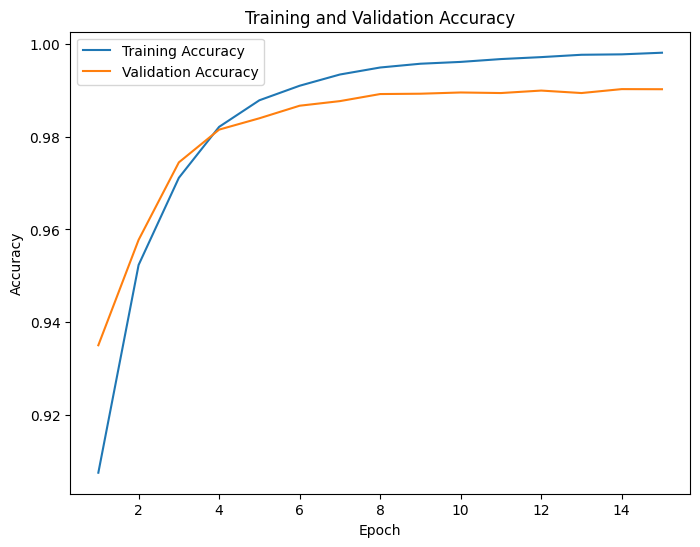

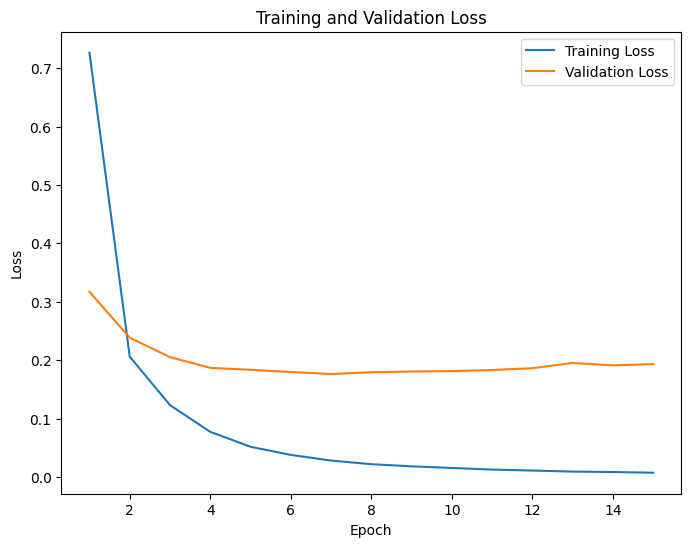

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Val F1 score: 0.7683949491643709


In [17]:
#TODO
embedding_dim = 128
vocab_size = num_words

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim)) #layer 1
model.add(LSTM(128,return_sequences=True,)) #layer 2
model.add(Dense(256,activation="relu")) #layer 3
model.add(Dense(119,activation="softmax")) #layer 4

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

plot_accuracy(history)
plot_loss(history)

probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_falt = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_falt = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_falt,predicted_labels_falt, average="macro")
print(f"Val F1 score: {f1}")

Com ja sabeu, NER es una tasca on les dades estan molt desbalancejades. La gran majoria de les nostres etiquetes serán 'O' (outside). Es pot donar el cas on el model tingui una accuracy molt alta predint sempre 'O'.

Per mesurar millor com de bó és el nostre model, calcularem la F1 score per cada classe, així com la mitjana (macro average). Quan prepareu el vostre document, heu de reportar aquesta mitjana com a mètrica del vostre model, no l'acuracy.

In [18]:
preds = model.predict(val_pad_sequences)

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)

print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.90      0.95        20
           2       0.96      0.98      0.97       101
           3       1.00      0.88      0.93         8
           4       0.80      0.80      0.80         5
           5       1.00      0.00      0.00         1
           6       0.83      1.00      0.91        10
           7       0.50      0.67      0.57         3
           8       1.00      0.67      0.80         3
          10       0.67      0.67      0.67         3
          12       1.00      0.71      0.83         7
          13       1.00      0.80      0.89         5
          14       1.00      0.91      0.95        11
          15       0.91      0.91      0.91        11
          16       0.83      0.74      0.78        46
          17       0.88      0.91      0.90        33
          18       1.00      0.83      0.

A continuació podeu veure algunes prediccions del model.

In [19]:
probs = model.predict(test_pad_sequences)
_predicted_labels = np.argmax(probs, axis=2)

predicted_labels = [list(label_encoder.inverse_transform(label)) for label in _predicted_labels]

for i in range(0, 5):
    print('Sentence: ', test_sentences[i])
    print('Original label: ', test_labels[i].split())
    print('Predicted label: ', predicted_labels[i])
    print()

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Sentence:  i would like to find a flight from charlotte to las vegas that makes a stop in st. louis
Original label:  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
Predicted label:  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

Sentence:  on april first i need a ticket from tacoma to san jose departing before 7 am
Original label:  ['O', 'B-depart_date.month_name', 'B-depart_date.day_number', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'B-depart_time.time_relative', 'B-depart_time.time', 'I-de

---

 <h1><a name="ex-six"><center> ✏ Exercici 6 ✏ </a></h1>

Modifiqueu els següents paràmetres del model anterior i analitzeu com afecten a la seva *accuracy*:

 1. **Mida dels Embeddings.** Proveu diferents mides d'*Embeddings* i observeu com canvia l'*accuracy* del model. Heu d'explicar les vostres conclusions.

 2. **Xarxes Convolucionals.** Afegiu capes convolucionals al vostre model. Expliqueu amb detall els valors que heu provat i la vostra motivació a l'hora d'escollir-los. Recordeu, que també podeu provar diferents configuracions de *pooling*.

 3. **Xarxes Recurrents.**  Afegiu capes recurrents al vostre model (LSTM, GRU). Expliqueu amb detall els valors que heu provat i la vostra motivació.

 4. ** Transformer.** Afegiu blocs de Transformer al vostre model. Expliqueu amb detall els valors que heu provat i la vostra motivació.

 5. **Regularització.** Quan proveu configuracions amb més paràmetres veureu que el model comença a tenir *overfitting* molt prompte durant l'entrenament. Afegiu *Dropout* al vostre model. Heu d'explicar la vostra decisió de valors i de posició dins de la xarxa.


 6. **Balancejat de les classes.** Si analitzeu el dataset, veureu que la freqüència de les classes està molt desbalancejada. Keras us permet afegir un pes per a cada classe a l'hora de calcular la loss (Mireu el paràmetre "class_weigth" a la documentació https://keras.io/api/models/model_training_apis/). Calculeu un pes per a cada classe i afegiu-lo al mètode fit del vostre model.

 ---

**MIDA DELS EMBEDDINGS:**

In [20]:
#TODO
resultados = []
reports = []

for embedding_dim in [32,64,128,256,512,1048]:
    vocab_size = num_words

    model = Sequential()
    model.add(Embedding(vocab_size,embedding_dim)) #layer 1
    model.add(LSTM(128,return_sequences=True,)) #layer 2
    model.add(Dense(256,activation="relu")) #layer 3
    model.add(Dense(119,activation="softmax")) #layer 4

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    #Train the model
    batch_size = 32
    epochs = 15
    history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

    probs = model.predict(val_pad_sequences)
    predicted_labels = np.argmax(probs,axis=-1)
    val_pad_labels_falt = [item for sublista in val_pad_labels for item in sublista]
    predicted_labels_falt = [item for sublista in predicted_labels for item in sublista]
    f1 = f1_score(val_pad_labels_falt,predicted_labels_falt, average="macro")

    resultados.append({
                    'embedding_dim': embedding_dim,
                    'Train Accuracy': history.history['accuracy'][-1],
                    'Validation Accuracy': history.history['val_accuracy'][-1],
                    "history": history,
                    "f1_score" : f1
                })

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.8717 - loss: 1.7731 - val_accuracy: 0.9111 - val_loss: 0.3722
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.9267 - loss: 0.2999 - val_accuracy: 0.9487 - val_loss: 0.2835
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9568 - loss: 0.1859 - val_accuracy: 0.9603 - val_loss: 0.2520
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9667 - loss: 0.1368 - val_accuracy: 0.9681 - val_loss: 0.2330
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.9738 - loss: 0.1074 - val_accuracy: 0.9737 - val_loss: 0.2164
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.9802 - loss: 0.0808 - val_accuracy: 0.9786 - val_loss: 0.2061
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9848 - loss: 0.0638 - val_accuracy: 0.9824 - val_loss: 0.2021
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9874 - loss: 0.0511 - val

In [21]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados.sort_values(by='Validation Accuracy', ascending=False))
print(df_resultados.sort_values(by='f1_score', ascending=False))


millors_resultats = df_resultados.sort_values(by='Validation Accuracy', ascending=False).head(1)


   embedding_dim  Train Accuracy  Validation Accuracy  \
4            512        0.999009             0.990960   
5           1048        0.999302             0.990766   
3            256        0.998625             0.990233   
2            128        0.998103             0.990063   
1             64        0.997074             0.989603   
0             32        0.995699             0.988997   

                                             history  f1_score  
4  <keras.src.callbacks.history.History object at...  0.783811  
5  <keras.src.callbacks.history.History object at...  0.768375  
3  <keras.src.callbacks.history.History object at...  0.763008  
2  <keras.src.callbacks.history.History object at...  0.738556  
1  <keras.src.callbacks.history.History object at...  0.706638  
0  <keras.src.callbacks.history.History object at...  0.657587  
   embedding_dim  Train Accuracy  Validation Accuracy  \
4            512        0.999009             0.990960   
5           1048        0.99930

**XARXES CONVOLUCIONALS:**

Tamaño ventana = 3:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.8880 - loss: 1.1440 - val_accuracy: 0.9701 - val_loss: 0.2214
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9799 - loss: 0.0869 - val_accuracy: 0.9837 - val_loss: 0.1756
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9902 - loss: 0.0401 - val_accuracy: 0.9863 - val_loss: 0.1695
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.9944 - loss: 0.0225 - val_accuracy: 0.9879 - val_loss: 0.1626
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9951 - loss: 0.0177 - val_accuracy: 0.9881 - val_loss: 0.1675
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9959 - loss: 0.0136 - val_accuracy: 0.9887 - val_loss: 0.1613
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9961 - loss: 0.0117 - val_accuracy: 0.9892 - val_loss: 0.1690
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9965 - loss: 0.0106 - v

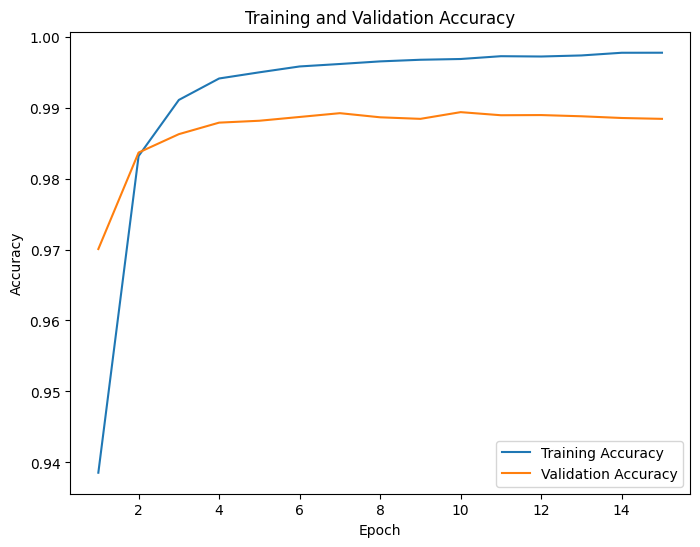

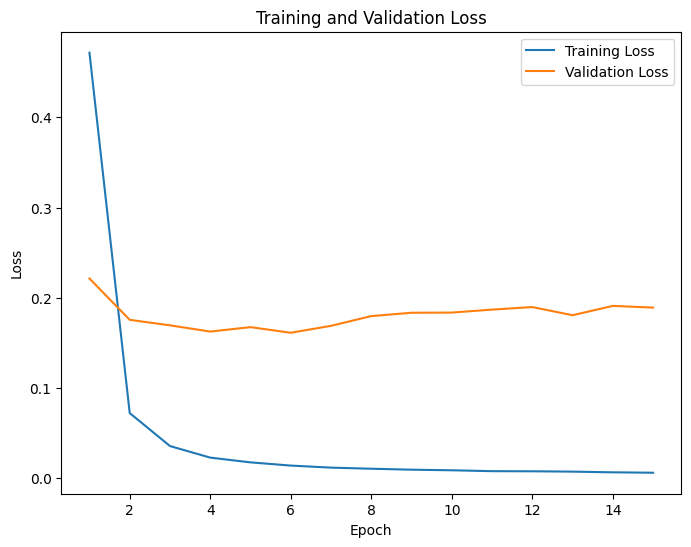

In [27]:
embedding_dim = 512
vocab_size = num_words

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))
model.add(Dense(256, activation='relu'))
model.add(Dense(119, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

plot_accuracy(history)
plot_loss(history)

In [28]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Val F1 score: 0.6520730140453012
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.95      1.00      0.98        20
           2       0.99      0.99      0.99       101
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00         5
           5       0.33      1.00      0.50         1
           6       0.50      0.30      0.38        10
           7       1.00      0.33      0.50         3
           8       0.50      0.33      0.40         3
          10       1.00      0.00      0.00         3
          12       0.00      0.00      0.00         7
          13       1.00      0.00      0.00         5
          14       0.38      0.82      0.51        11
          15       0.53      0.91      0.67        11
          16       0.95      0.76      0.84        46
          17       1.00      0.97      0.98        33
        

Tamaño ventana = 5:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.8904 - loss: 1.0226 - val_accuracy: 0.9678 - val_loss: 0.2153
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9768 - loss: 0.0991 - val_accuracy: 0.9808 - val_loss: 0.1596
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9900 - loss: 0.0390 - val_accuracy: 0.9866 - val_loss: 0.1477
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9941 - loss: 0.0233 - val_accuracy: 0.9883 - val_loss: 0.1517
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.9957 - loss: 0.0158 - val_accuracy: 0.9892 - val_loss: 0.1531
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9891 - val_loss: 0.1702
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9972 - loss: 0.0095 - val_accuracy: 0.9896 - val_loss: 0.1653
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9979 - loss: 0.00

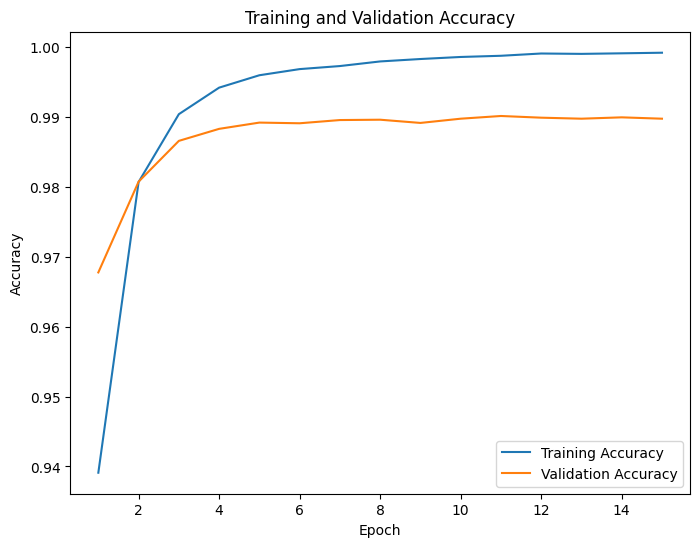

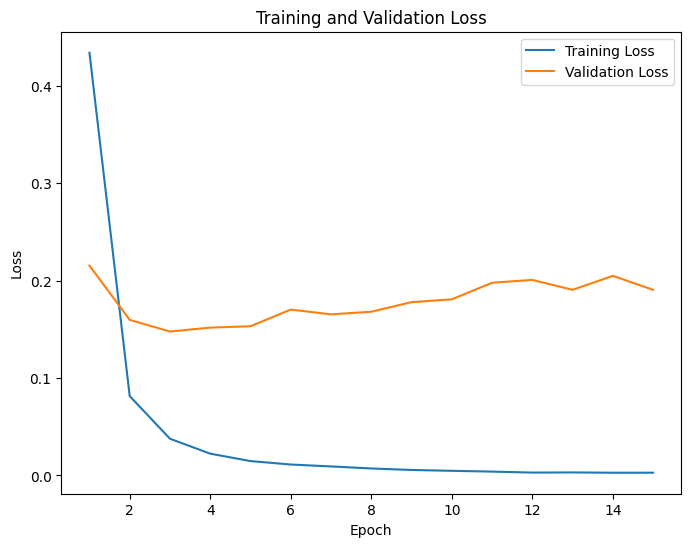

In [29]:
embedding_dim = 512
vocab_size = num_words

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu',padding='same'))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu',padding='same'))
model.add(Dense(256, activation='relu'))
model.add(Dense(119, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

plot_accuracy(history)
plot_loss(history)

In [30]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Val F1 score: 0.6949682740000892
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.95      0.95      0.95        20
           2       0.98      0.99      0.99       101
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       0.70      0.70      0.70        10
           7       1.00      0.67      0.80         3
           8       1.00      0.67      0.80         3
          10       0.50      0.33      0.40         3
          12       1.00      0.29      0.44         7
          13       1.00      0.40      0.57         5
          14       0.60      0.82      0.69        11
          15       0.69      0.82      0.75        11
          16       0.97      0.83      0.89        46
          17       1.00      0.97      0.98        33
        

Tamaño ventana = 7:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.8895 - loss: 0.9912 - val_accuracy: 0.9670 - val_loss: 0.2088
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9773 - loss: 0.0986 - val_accuracy: 0.9824 - val_loss: 0.1537
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9909 - loss: 0.0367 - val_accuracy: 0.9864 - val_loss: 0.1423
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.9947 - loss: 0.0211 - val_accuracy: 0.9882 - val_loss: 0.1530
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.9963 - loss: 0.0132 - val_accuracy: 0.9895 - val_loss: 0.1478
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.9976 - loss: 0.0091 - val_accuracy: 0.9896 - val_loss: 0.1565
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.9903 - val_loss: 0.1635
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9988 - loss: 0

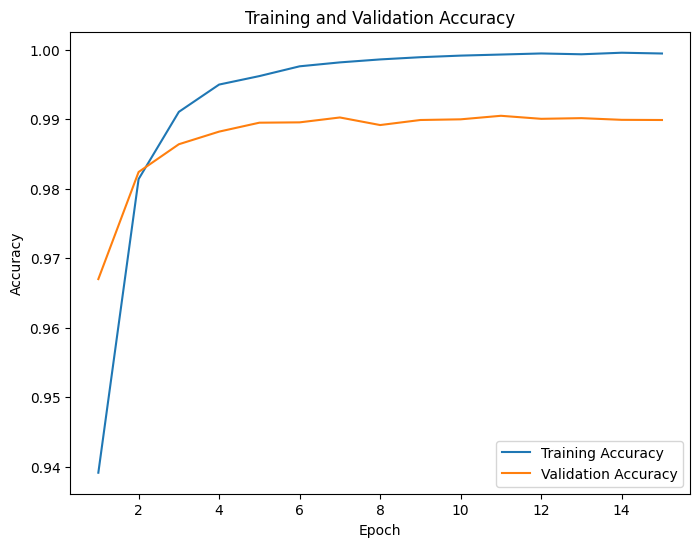

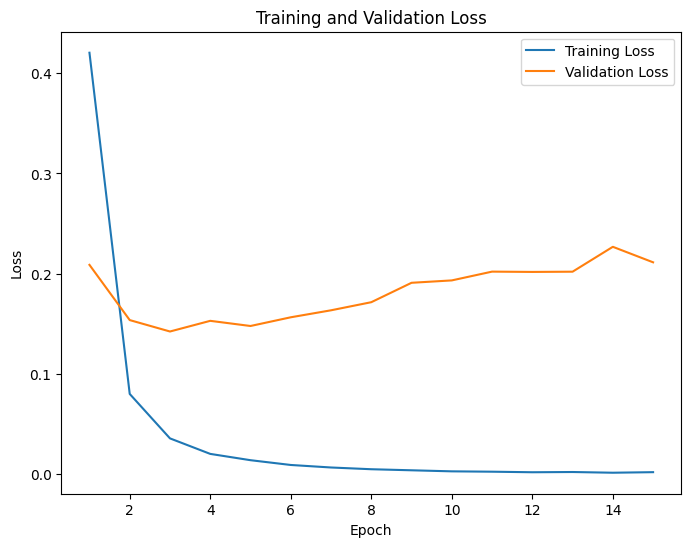

In [31]:
embedding_dim = 512
vocab_size = num_words

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu',padding='same'))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu',padding='same'))
model.add(Dense(256, activation='relu'))
model.add(Dense(119, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

plot_accuracy(history)
plot_loss(history)

In [32]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Val F1 score: 0.7192011369539762
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.86      0.95      0.90        20
           2       0.98      0.98      0.98       101
           3       1.00      1.00      1.00         8
           4       0.71      1.00      0.83         5
           5       1.00      1.00      1.00         1
           6       1.00      0.70      0.82        10
           7       1.00      0.67      0.80         3
           8       1.00      0.67      0.80         3
          10       1.00      0.33      0.50         3
          12       1.00      0.29      0.44         7
          13       1.00      0.40      0.57         5
          14       0.50      0.82      0.62        11
          15       0.75      0.82      0.78        11
          16       0.95      0.83      0.88        46
          17       1.00      0.97      0.98        33
        

**Xarxes Recurrents:**

Bidirectional:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 235ms/step - accuracy: 0.8772 - loss: 0.9773 - val_accuracy: 0.9539 - val_loss: 0.2378
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.9647 - loss: 0.1552 - val_accuracy: 0.9813 - val_loss: 0.1534
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 306ms/step - accuracy: 0.9878 - loss: 0.0544 - val_accuracy: 0.9870 - val_loss: 0.1382
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - accuracy: 0.9939 - loss: 0.0271 - val_accuracy: 0.9894 - val_loss: 0.1340
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.9964 - loss: 0.0173 - val_accuracy: 0.9906 - val_loss: 0.1327
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 34s 268ms/step - accuracy: 0.9976 - loss: 0.0110 - val_accuracy: 0.9909 - val_loss: 0.1369
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 38s 242ms/step - accuracy: 0.9983 - loss: 0.0076 - val_accuracy: 0.9910 - val_loss: 0.1378
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.9987 - loss: 0

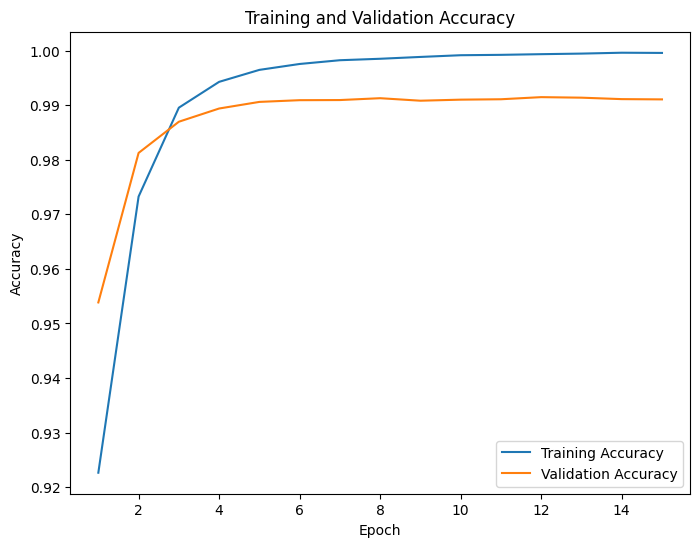

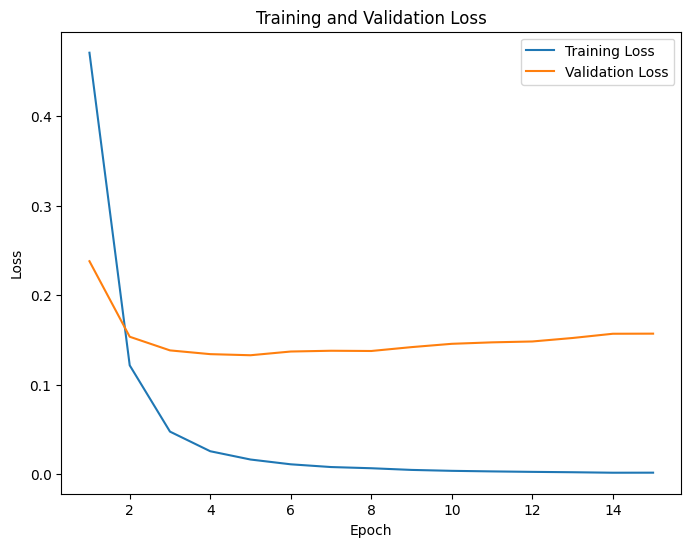

In [33]:
vocab_size = num_words
embedding_dim = 512

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  # Capa de embedding
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Capa Bidirectional LSTM
model.add(Dense(256, activation="relu"))  # Capa densa intermedia
model.add(Dense(119, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

#plots
plot_accuracy(history)
plot_loss(history)

In [34]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step
Val F1 score: 0.782283230505875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.90      0.95        20
           2       0.98      0.99      0.99       101
           3       0.89      1.00      0.94         8
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       0.82      0.90      0.86        10
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          12       1.00      0.86      0.92         7
          13       0.80      0.80      0.80         5
          14       0.79      1.00      0.88        11
          15       0.92      1.00      0.96        11
          16       0.83      0.87      0.85        46
          17       1.00      0.97      0.98        33
         

GRU:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 142ms/step - accuracy: 0.8795 - loss: 1.1377 - val_accuracy: 0.9704 - val_loss: 0.2109
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9793 - loss: 0.1049 - val_accuracy: 0.9824 - val_loss: 0.1477
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.9889 - loss: 0.0491 - val_accuracy: 0.9864 - val_loss: 0.1358
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.9930 - loss: 0.0318 - val_accuracy: 0.9883 - val_loss: 0.1310
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.9954 - loss: 0.0196 - val_accuracy: 0.9893 - val_loss: 0.1277
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.9962 - loss: 0.0150 - val_accuracy: 0.9898 - val_loss: 0.1283
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9971 - loss: 0.0117 - val_accuracy: 0.9905 - val_loss: 0.1313
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.9975 - loss: 0

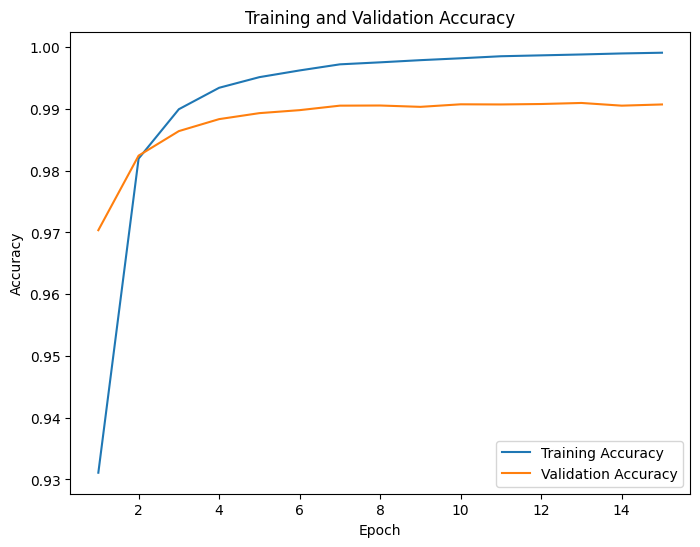

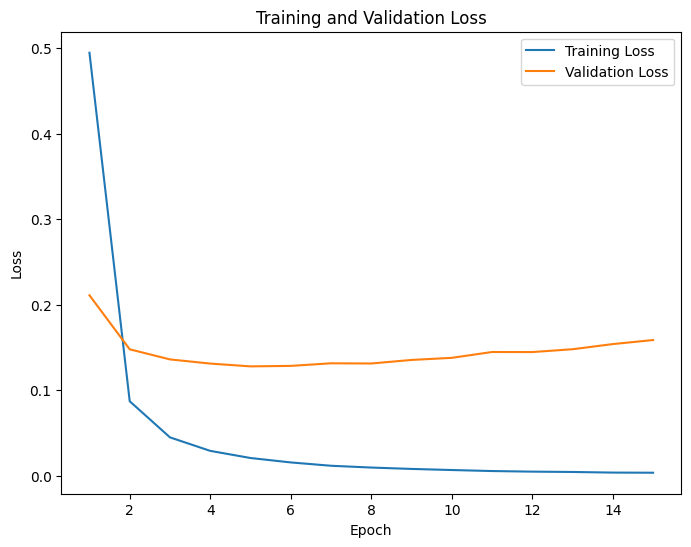

In [35]:
vocab_size = num_words
embedding_dim = 512

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  # Capa de embedding
model.add(GRU(128, return_sequences=True))  # Capa GRU en lugar de LSTM o Bidirectional
model.add(Dense(256, activation="relu"))  # Capa densa intermedia
model.add(Dense(119, activation="softmax"))  # Capa de salida

history = model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

#plots
plot_accuracy(history)
plot_loss(history)

In [36]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
Val F1 score: 0.7496700437673902
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.90      0.95        20
           2       0.97      0.99      0.98       101
           3       1.00      1.00      1.00         8
           4       0.56      1.00      0.71         5
           5       1.00      1.00      1.00         1
           6       0.83      1.00      0.91        10
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
          10       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         7
          13       1.00      0.40      0.57         5
          14       1.00      1.00      1.00        11
          15       1.00      0.91      0.95        11
          16       0.92      0.72      0.80        46
          17       0.88      0.85      0.86        33
        

**Transformers:**

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 106s 779ms/step - accuracy: 0.9019 - loss: 0.4955 - val_accuracy: 0.9708 - val_loss: 0.1320
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 108s 842ms/step - accuracy: 0.9778 - loss: 0.0613 - val_accuracy: 0.9792 - val_loss: 0.1189
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 101s 786ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9829 - val_loss: 0.1135
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 99s 775ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9852 - val_loss: 0.1136
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 114s 893ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9856 - val_loss: 0.1123
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 132s 816ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9866 - val_loss: 0.1142
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 94s 732ms/step - accuracy: 0.9966 - loss: 0.0101 - val_accuracy: 0.9868 - val_loss: 0.1120
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 154s 828ms/step - accuracy: 0.9978 - l

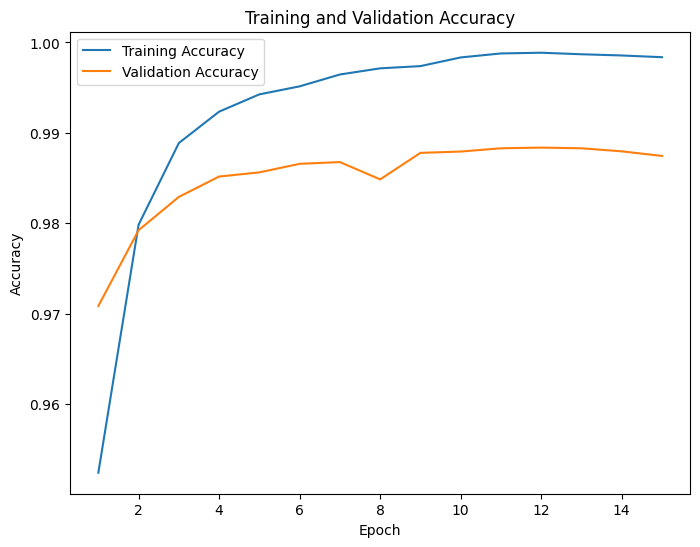

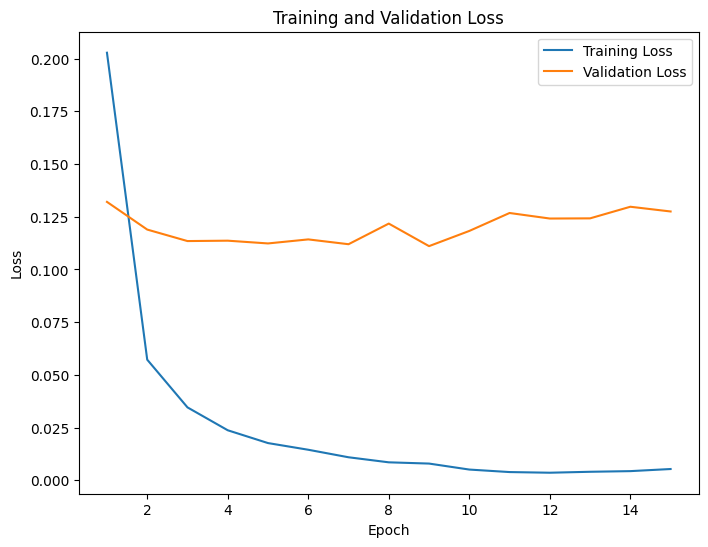

In [ ]:
vocab_size = num_words
embedding_dim = 512
num_heads = 4
ff_dim = 640

model = Sequential()
model.add(keras.layers.Input(shape=(max_sequence_length,)))
model.add(TokenAndPositionEmbedding(max_sequence_length, vocab_size, embedding_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(Dense(256, activation="relu"))
model.add(Dense(119, activation="softmax")) 

history = model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

#plots
plot_accuracy(history)
plot_loss(history)

In [39]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step
Val F1 score: 0.6779268541662304
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.90      0.90      0.90        20
           2       0.99      0.98      0.99       101
           3       1.00      1.00      1.00         8
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         1
           6       1.00      0.80      0.89        10
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
          10       1.00      0.00      0.00         3
          12       1.00      0.14      0.25         7
          13       1.00      0.20      0.33         5
          14       0.67      0.91      0.77        11
          15       1.00      0.91      0.95        11
          16       0.91      0.87      0.89        46
          17       1.00      0.97      0.98        33
       

Transformer amb arquitectura més complexe:

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 564s 4s/step - accuracy: 0.8446 - loss: 0.9036 - val_accuracy: 0.9109 - val_loss: 0.5941
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 523s 4s/step - accuracy: 0.9093 - loss: 0.5982 - val_accuracy: 0.9109 - val_loss: 0.5834
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 572s 4s/step - accuracy: 0.9109 - loss: 0.5871 - val_accuracy: 0.9109 - val_loss: 0.5909
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 554s 4s/step - accuracy: 0.9089 - loss: 0.5949 - val_accuracy: 0.9109 - val_loss: 0.5883
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 616s 5s/step - accuracy: 0.9094 - loss: 0.5917 - val_accuracy: 0.9109 - val_loss: 0.5869
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 574s 4s/step - accuracy: 0.9103 - loss: 0.5855 - val_accuracy: 0.9109 - val_loss: 0.5841
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 620s 5s/step - accuracy: 0.9100 - loss: 0.5915 - val_accuracy: 0.9109 - val_loss: 0.5847
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 571s 4s/step - accuracy: 0.9097 - loss: 0.5887 - val_accu

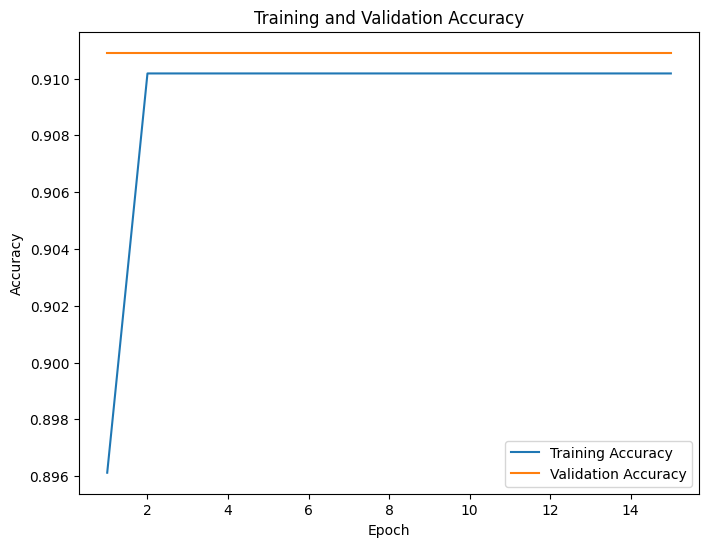

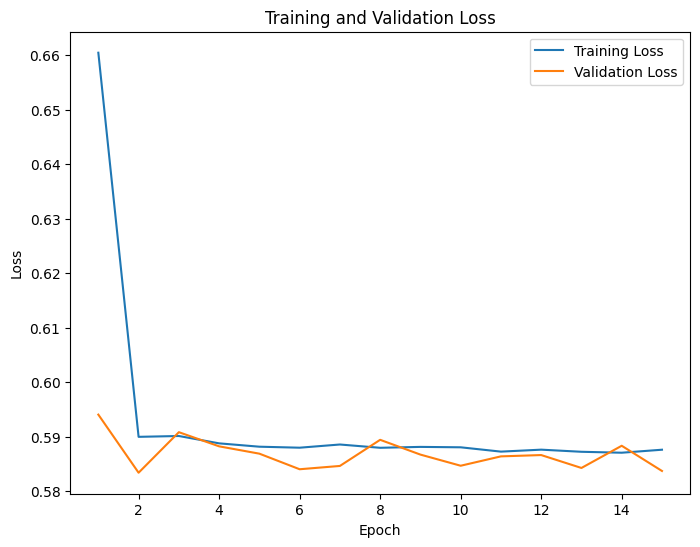

In [41]:
vocab_size = num_words
embedding_dim = 512
num_heads = 8
ff_dim = 640

model = Sequential()
model.add(keras.layers.Input(shape=(max_sequence_length,)))
model.add(TokenAndPositionEmbedding(max_sequence_length, vocab_size, embedding_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(Dense(256, activation="relu"))  # Capa densa intermedia
model.add(Dense(119, activation="softmax"))  # Capa de salida

history = model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

#plots
plot_accuracy(history)
plot_loss(history)

In [42]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 826ms/step
Val F1 score: 0.009828645903066006
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00        20
           2       1.00      0.00      0.00       101
           3       1.00      0.00      0.00         8
           4       1.00      0.00      0.00         5
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00        10
           7       1.00      0.00      0.00         3
           8       1.00      0.00      0.00         3
          10       1.00      0.00      0.00         3
          12       1.00      0.00      0.00         7
          13       1.00      0.00      0.00         5
          14       1.00      0.00      0.00        11
          15       1.00      0.00      0.00        11
          16       1.00      0.00      0.00        46
          17       1.00      0.00      0.00        33
    

**Regularització:**

In [ ]:
vocab_size = num_words
embedding_dim = 512

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  # Capa de embedding
model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_regularizer = 'l2',recurrent_dropout = 0.6)))  # Capa Bidirectional LSTM
model.add(Dense(256, activation="relu"))  # Capa densa intermedia
model.add(Dropout(0.6))
model.add(Dense(119, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels))

#plots
plot_accuracy(history)
plot_loss(history)

Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 50s 322ms/step - accuracy: 0.8626 - loss: 2.4114 - val_accuracy: 0.9442 - val_loss: 0.3268
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 91s 390ms/step - accuracy: 0.9511 - loss: 0.2434 - val_accuracy: 0.9666 - val_loss: 0.1912
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 49s 386ms/step - accuracy: 0.9735 - loss: 0.1202 - val_accuracy: 0.9796 - val_loss: 0.1491
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 94s 475ms/step - accuracy: 0.9823 - loss: 0.0770 - val_accuracy: 0.9841 - val_loss: 0.1364
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 73s 401ms/step - accuracy: 0.9880 - loss: 0.0551 - val_accuracy: 0.9872 - val_loss: 0.1323
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 61s 237ms/step - accuracy: 0.9915 - loss: 0.0387 - val_accuracy: 0.9884 - val_loss: 0.1292
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 46s 273ms/step - accuracy: 0.9932 - loss: 0.0302 - val_accuracy: 0.9893 - val_loss: 0.1287
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - accuracy: 0.9946 - loss: 0

In [ ]:
probs = model.predict(val_pad_sequences)
predicted_labels = np.argmax(probs,axis=-1)
val_pad_labels_flat = [item for sublista in val_pad_labels for item in sublista]
predicted_labels_flat = [item for sublista in predicted_labels for item in sublista]
f1 = f1_score(val_pad_labels_flat,predicted_labels_flat, average="macro")
print(f"Val F1 score: {f1}")

val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(probs, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

**Balancejat de les classes:**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
train_pad_labels_flat = [label for labels in train_pad_labels for label in labels]
weights = compute_class_weight(class_weight='balanced',classes= np.array(label_encoder.transform(unique_entities)),y= train_pad_labels_flat)
class_weights = dict(zip(label_encoder.transform(unique_entities,weights)))
print(class_weights)

In [ ]:
vocab_size = num_words
embedding_dim = 512

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  # Capa de embedding
model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_regularizer = 'l2',recurrent_dropout = 0.6)))  # Capa Bidirectional LSTM
model.add(Dense(256, activation="relu"))  # Capa densa intermedia
model.add(Dropout(0.6))
model.add(Dense(119, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train the model
batch_size = 32
epochs = 15
history = model.fit(train_pad_sequences, train_pad_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_pad_sequences, val_pad_labels), class_weights = class_weights)

#plots
plot_accuracy(history)
plot_loss(history)

---

<h1><a name="section-four"> 4. Lliurable </a></h1>

Heu d'entregar un document PDF de com a **màxim 10 pàgines** que incloga els resultats de tots els exercicis així com una explicació de cadascun dels resultats i de la modificació que heu fet. L'estructura del document és:

1. Introducció.
2. Experiments i Resultats (amb raonament).
3. Conclusions.

No cal que afegiu el vostre codi al document, podeu entregar el *notebook* juntament amb el document.

 ---